<a href="https://colab.research.google.com/github/ajay47847/Internship_Task/blob/main/PSDwindowsNormScale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

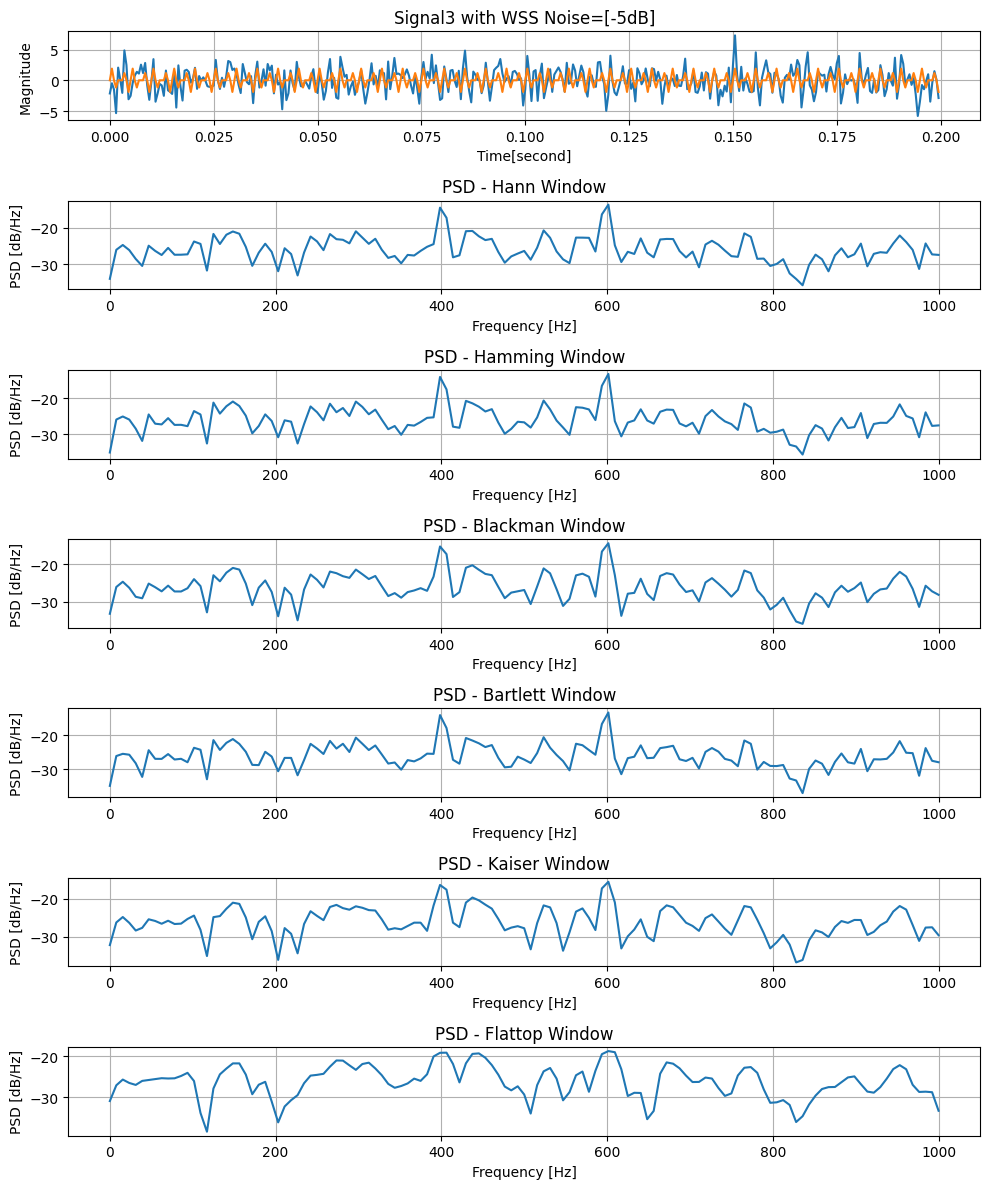

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, windows

fs = 2000
duration=0.2
t = np.arange(0,duration,1/fs)
signal1 = np.sin(2 * np.pi * 400 * t)
signal2 = np.sin(2 * np.pi * 600 * t)
signal3 = signal1 + signal2

power=signal3**2
signal3_avg_power=np.mean(power)
signal3_avg_power_db=10*np.log10(signal3_avg_power)
mean_noise=0

snr_db1=-5
noise_db1=signal3_avg_power_db - snr_db1
noise_watts1=10**(noise_db1/10)
noise1=np.random.normal(mean_noise,np.sqrt(noise_watts1),size=len(signal3))
noise_signal1=signal3 + noise1

plt.figure(figsize=(10, 12))
# Length of each segment
nperseg = 256
# Number of points to overlap between segments
noverlap=128

plt.subplot(7,1,1)
plt.plot(t,noise_signal1)
plt.plot(t,signal3)
plt.title('Signal3 with WSS Noise=[-5dB]')
plt.xlabel('Time[second]')
plt.ylabel('Magnitude')
plt.grid(True)

frequencies_hann, psd_hann = welch(noise_signal1, fs, window=windows.hann(nperseg), nperseg=nperseg, noverlap=noverlap)
psd_db_hann = 10 * np.log10(psd_hann)
plt.subplot(7,1,2)
plt.plot(frequencies_hann, psd_db_hann)
plt.title('PSD - Hann Window')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.grid(True)

frequencies_hamming, psd_hamming = welch(noise_signal1, fs, window=windows.hamming(nperseg), nperseg=nperseg, noverlap=noverlap)
psd_db_hamming = 10 * np.log10(psd_hamming)
plt.subplot(7,1,3)
plt.plot(frequencies_hamming, psd_db_hamming)
plt.title('PSD - Hamming Window')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.grid(True)

frequencies_blackman, psd_blackman = welch(noise_signal1, fs, window=windows.blackman(nperseg), nperseg=nperseg, noverlap=noverlap)
psd_db_blackman = 10 * np.log10(psd_blackman)
plt.subplot(7,1,4)
plt.plot(frequencies_blackman, psd_db_blackman)
plt.title('PSD - Blackman Window')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.grid(True)

frequencies_bartlett, psd_bartlett = welch(noise_signal1, fs, window=windows.bartlett(nperseg), nperseg=nperseg, noverlap=noverlap)
psd_db_bartlett = 10 * np.log10(psd_bartlett)
plt.subplot(7,1,5)
plt.plot(frequencies_bartlett, psd_db_bartlett)
plt.title('PSD - Bartlett Window')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.grid(True)

frequencies_kaiser, psd_kaiser = welch(noise_signal1, fs, window=windows.kaiser(nperseg, beta=14), nperseg=nperseg, noverlap=noverlap)
psd_db_kaiser = 10 * np.log10(psd_kaiser)
plt.subplot(7,1,6)
plt.plot(frequencies_kaiser, psd_db_kaiser)
plt.title('PSD - Kaiser Window')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.grid(True)

frequencies_flattop, psd_flattop = welch(noise_signal1, fs, window=windows.flattop(nperseg), nperseg=nperseg, noverlap=noverlap )
psd_db_flattop = 10 * np.log10(psd_flattop)
plt.subplot(7,1,7)
plt.plot(frequencies_flattop, psd_db_flattop)
plt.title('PSD - Flattop Window')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.grid(True)


plt.tight_layout()
plt.show()

